In [1]:
import seaborn as sns
import pandas as pd

In [3]:
df= pd.read_csv("C:\\Users\Parkar\\Desktop\\Project\\Python\\Logistic_regression\\diabetes.csv")
df.head(3)

<>:1: SyntaxWarning: invalid escape sequence '\P'
<>:1: SyntaxWarning: invalid escape sequence '\P'
C:\Users\Parkar\AppData\Local\Temp\ipykernel_30196\1372683498.py:1: SyntaxWarning: invalid escape sequence '\P'
  df= pd.read_csv("C:\\Users\Parkar\\Desktop\\Project\\Python\\Logistic_regression\\diabetes.csv")


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [5]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

<Axes: >

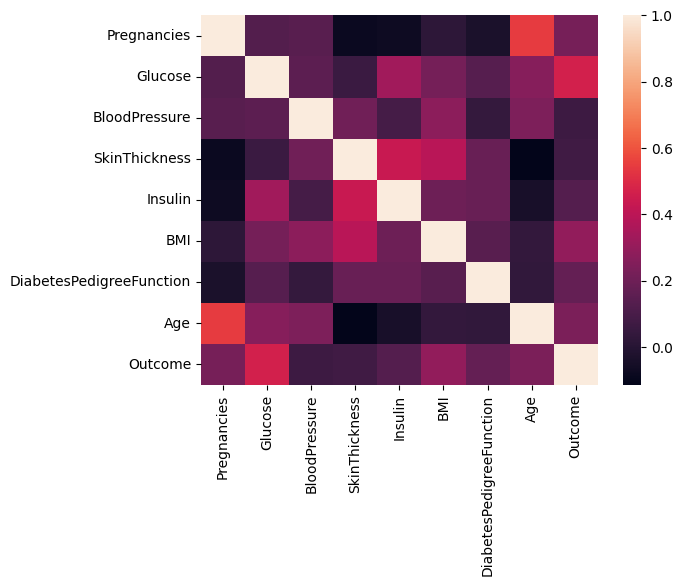

In [10]:
sns.heatmap(df.corr())

In [11]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [13]:
X= df[['Pregnancies','Insulin','Glucose','BMI','DiabetesPedigreeFunction','Age']]
y= df.Outcome

In [17]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X_scalled= scalar.fit_transform(X)
print(X_scalled)

[[ 0.63994726 -0.69289057  0.84832379  0.20401277  0.46849198  1.4259954 ]
 [-0.84488505 -0.69289057 -1.12339636 -0.68442195 -0.36506078 -0.19067191]
 [ 1.23388019 -0.69289057  1.94372388 -1.10325546  0.60439732 -0.10558415]
 ...
 [ 0.3429808   0.27959377  0.00330087 -0.73518964 -0.68519336 -0.27575966]
 [-0.84488505 -0.69289057  0.1597866  -0.24020459 -0.37110101  1.17073215]
 [-0.84488505 -0.69289057 -0.8730192  -0.20212881 -0.47378505 -0.87137393]]


In [18]:
from sklearn.model_selection import train_test_split

X_scalled_train,X_scalled_test,y_train,y_test = train_test_split(X_scalled, y, test_size=0.3, random_state=42)

In [20]:
from sklearn.linear_model import LogisticRegression
lr= LogisticRegression()

In [26]:
from sklearn.model_selection import GridSearchCV

parameter = {'penalty':['l1','l2','elasticnet'],'C' : [1,2,3,4,5,6,7,8,9,10,15,19,20,30], 'max_iter' :[100,150,200,250,300]}

classifier=GridSearchCV(lr, param_grid=parameter, scoring='accuracy', cv=10)

In [27]:
classifier.fit(X_scalled_train, y_train)

C:\Users\Parkar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
1400 fits failed out of a total of 2100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
700 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Parkar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Parkar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Park

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 19, 20, 30],
                         'max_iter': [100, 150, 200, 250, 300],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='accuracy')

In [29]:
print('best parameter', classifier.best_params_)
print('best score', classifier.best_score_)

best parameter {'C': 1, 'max_iter': 100, 'penalty': 'l2'}
best score 0.7690426275331935


In [31]:
Diabetes_predict = classifier.predict(X_scalled_test)
Diabetes_predict

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0], dtype=int64)

In [36]:
from sklearn.metrics import accuracy_score, classification_report

print('Accuracy Score', accuracy_score(Diabetes_predict, y_test))
print(classification_report(Diabetes_predict, y_test))

Accuracy Score 0.7359307359307359
              precision    recall  f1-score   support

           0       0.81      0.79      0.80       156
           1       0.59      0.63      0.61        75

    accuracy                           0.74       231
   macro avg       0.70      0.71      0.70       231
weighted avg       0.74      0.74      0.74       231

